In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [5]:
torch.manual_seed(0)
np.random.seed(0)

In [6]:
num_points = 100

key_size = 2
memory_size = num_points * 2
value_size = 2

learning_rate = 3e-4
num_epochs = 50000

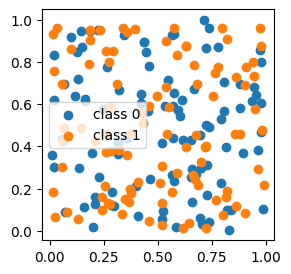

In [7]:
# Class 0 and 1
data_class0 = np.random.rand(num_points, key_size)
data_class1 = np.random.rand(num_points, key_size)
labels_class0 = np.hstack([np.zeros((num_points, 1)), np.ones((num_points, 1))])
labels_class1 = np.hstack([np.ones((num_points, 1)), np.zeros((num_points, 1))])

plt.figure(figsize = (3, 3))
plt.scatter(data_class0[:, 0], data_class0[:, 1], label = 'class 0')
plt.scatter(data_class1[:, 0], data_class1[:, 1], label = 'class 1')
plt.legend()
plt.show()

In [8]:
labels_class1

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [9]:
data = []
labels = []

data.append(data_class0)
labels.append(labels_class0)

data.append(data_class1)
labels.append(labels_class1)

# combine data and labels
data = np.vstack(data)
labels = np.concatenate(labels)

data_tensor = torch.tensor(data, dtype = torch.float32)
labels_tensor = torch.tensor(labels, dtype = torch.float32)

In [10]:
# initial W_keys and W_values
init_W_keys = data_tensor.clone()
init_W_values = torch.tensor(np.random.rand(memory_size, value_size), dtype = torch.float32)

In [11]:
class KeyValueMemory(nn.Module):
    def __init__(
            self,
            key_size,
            memory_size,
            value_size,
            W_keys,
            W_values,
        ):
        super(KeyValueMemory, self).__init__()
        self.key_size = key_size
        self.memory_size = memory_size
        self.value_size = value_size
        self.W_keys = nn.Parameter(W_keys) # (memory_size, key_size)
        self.W_values = nn.Parameter(W_values) # (memory_size, value_size)

    def forward(self):
        # compute similarity scores
        attention_weights = torch.matmul(self.W_keys, self.W_keys.T) / self.key_size ** 0.5 # (memory_size, memory_size)
        attention_weights = torch.softmax(attention_weights, dim = -1)
        output = torch.matmul(attention_weights, torch.sigmoid(self.W_values)) # (memory_size, value_size)
        return output

In [12]:
# model, loss, and optimizer
model = KeyValueMemory(
    key_size = key_size,
    memory_size = memory_size,
    value_size = value_size,
    W_keys = init_W_keys,
    W_values = init_W_values,
)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

# Training
losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model()
    loss = criterion(outputs, labels_tensor)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

/Users/sixingchen/Desktop/Codes/Project_Sampling_RNN/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [50/50000], Loss: 0.2630
Epoch [100/50000], Loss: 0.2622
Epoch [150/50000], Loss: 0.2613
Epoch [200/50000], Loss: 0.2606
Epoch [250/50000], Loss: 0.2598
Epoch [300/50000], Loss: 0.2591
Epoch [350/50000], Loss: 0.2584
Epoch [400/50000], Loss: 0.2577
Epoch [450/50000], Loss: 0.2571
Epoch [500/50000], Loss: 0.2565
Epoch [550/50000], Loss: 0.2560
Epoch [600/50000], Loss: 0.2554
Epoch [650/50000], Loss: 0.2548
Epoch [700/50000], Loss: 0.2543
Epoch [750/50000], Loss: 0.2538
Epoch [800/50000], Loss: 0.2532
Epoch [850/50000], Loss: 0.2526
Epoch [900/50000], Loss: 0.2520
Epoch [950/50000], Loss: 0.2513
Epoch [1000/50000], Loss: 0.2506
Epoch [1050/50000], Loss: 0.2498
Epoch [1100/50000], Loss: 0.2489
Epoch [1150/50000], Loss: 0.2478
Epoch [1200/50000], Loss: 0.2466
Epoch [1250/50000], Loss: 0.2452
Epoch [1300/50000], Loss: 0.2435
Epoch [1350/50000], Loss: 0.2416
Epoch [1400/50000], Loss: 0.2393
Epoch [1450/50000], Loss: 0.2367
Epoch [1500/50000], Loss: 0.2337
Epoch [1550/50000], Loss: 0.23

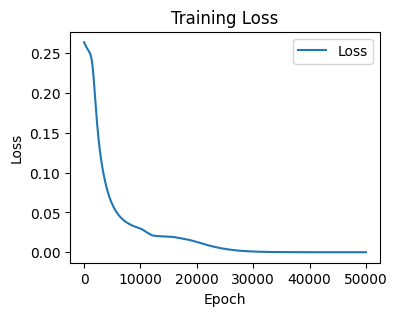

In [13]:
plt.figure(figsize = (4, 3))
plt.plot(losses, label = 'Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

(200, 2) (200, 2)


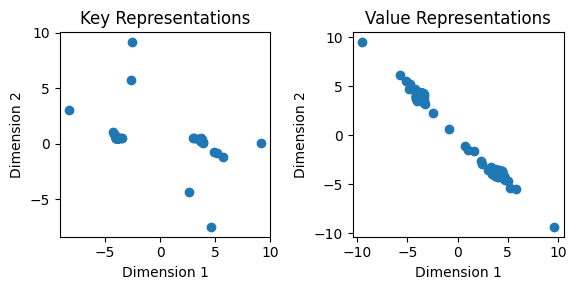

In [14]:
# Visualize keys and values
keys = model.W_keys.detach().numpy()
values = model.W_values.detach().numpy()
print(keys.shape, values.shape)

plt.figure(figsize = (6, 3))

# keys
plt.subplot(1, 2, 1)
plt.scatter(keys[:, 0], keys[:, 1])
plt.title('Key Representations')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
# plt.legend()

# values
plt.subplot(1, 2, 2)
plt.scatter(values[:, 0], values[:, 1])
plt.title('Value Representations')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
# plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
class KeyValueNet(nn.Module):
    """
    Key-value network.
    """

    def __init__(self, input_size, output_size, key_size, memory_size):
        super(KeyValueNet, self).__init__()
        self.fc_key = nn.Linear(input_size, key_size)
        self.fc_memory = nn.Linear(memory_size, output_size)
        # self.fc_value = nn.Identity()
    
    def forward(self, key, memory, keys = None, memories = None):
        # initialize keys
        if keys is None:
            keys = []
        
        # initialize memories
        if memories is None:
            memories = []
        
        
            



        self.logits = self.fc_action(x) # record logits for later analyses

        # no action masking
        if mask is None:
            dist = Categorical(logits = self.logits)
        
        # with action masking
        elif mask is not None:
            dist = CategoricalMasked(logits = self.logits, mask = mask)
        
        policy = dist.probs # (batch_size, output_dim)
        action = dist.sample() # (batch_size,)
        log_prob = dist.log_prob(action) # (batch_size,)
        entropy = dist.entropy() # (batch_size,)
        
        return action, policy, log_prob, entropy

    def encode(self, k, v):
        key = self.fc_key(k)
        value = self.fc_value(v)


In [3]:
help(nn.Identity)

Help on class Identity in module torch.nn.modules.linear:

class Identity(torch.nn.modules.module.Module)
 |  Identity(*args: Any, **kwargs: Any) -> None
 |  
 |  A placeholder identity operator that is argument-insensitive.
 |  
 |  Args:
 |      args: any argument (unused)
 |      kwargs: any keyword argument (unused)
 |  
 |  Shape:
 |      - Input: :math:`(*)`, where :math:`*` means any number of dimensions.
 |      - Output: :math:`(*)`, same shape as the input.
 |  
 |  Examples::
 |  
 |      >>> m = nn.Identity(54, unused_argument1=0.1, unused_argument2=False)
 |      >>> input = torch.randn(128, 20)
 |      >>> output = m(input)
 |      >>> print(output.size())
 |      torch.Size([128, 20])
 |  
 |  Method resolution order:
 |      Identity
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args: Any, **kwargs: Any) -> None
 |      Initialize internal Module state, shared by both nn.Module and ScriptModule.
 |